# [Your full name goes here]
# Programming Exercise \#2
---

# Preamble

In [181]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [182]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [183]:
telemetry = pd.read_csv('Data/iot_telemetry_dataset.csv')
telemetry.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


### (a)

The learning task is unsupervised because there is not specific output associated with each datapoint in the set. All of the variables in the dataset are independent variables that don't rely on the other variables. Because there is no specified output, it can be stated that the learning task is unsupervised. It is possible to model the data as supervised by isolating a variable and assuming it to be an output, as some of the codebases do that use this dataset, however since there is no clear output in the data itself, the data leads towards unsupervised.

### (b)

In [184]:
print(telemetry.shape[0])

405184


### (c)



In [185]:
print(telemetry[telemetry['device'] == '00:0f:00:70:91:0a'].shape[0])

111815



### (d)

In [186]:
print(telemetry[telemetry['device'] == '1c:bf:ce:15:ec:4d'].shape[0])

105918


### (e)

In [187]:
print(telemetry[telemetry['device'] == 'b8:27:eb:bf:9d:51'].shape[0])

187451


## Problem 1.2

### (a)

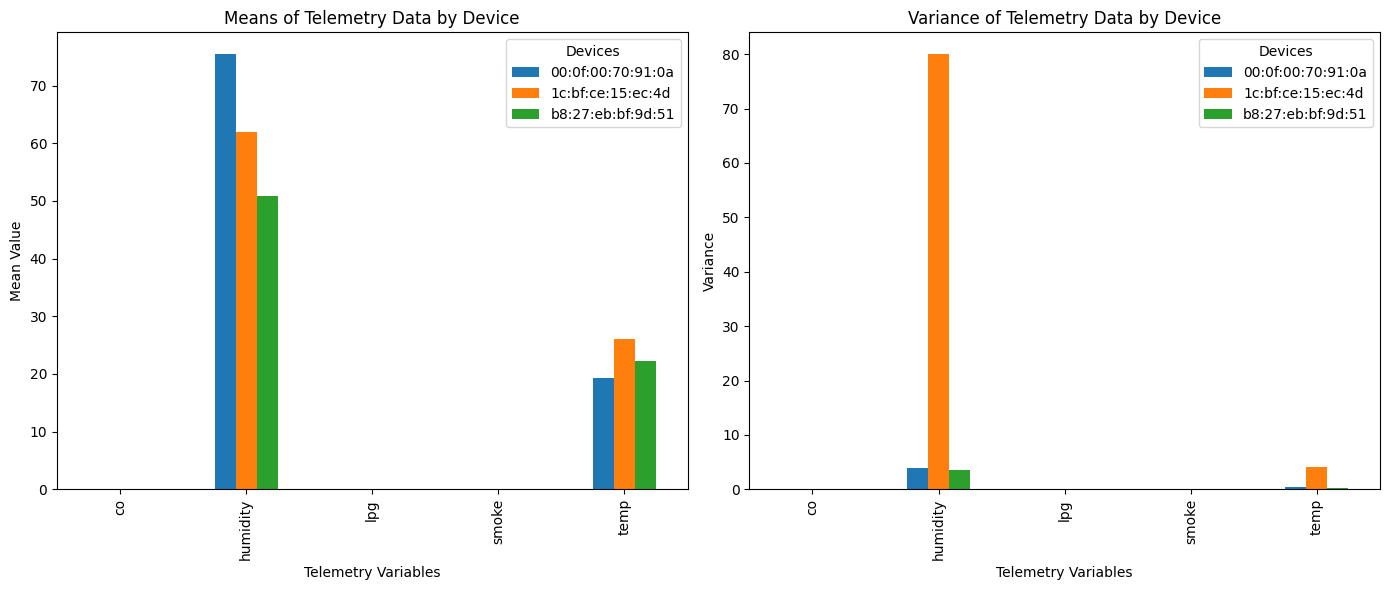

In [188]:
devices = ('00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51')
telemetry_columns = [col for col in telemetry.columns if col not in ['ts', 'device', 'light', 'motion']]

means_0 = telemetry.loc[telemetry['device'] == devices[0], telemetry_columns].mean()
means_1 = telemetry.loc[telemetry['device'] == devices[1], telemetry_columns].mean()
means_2 = telemetry.loc[telemetry['device'] == devices[2], telemetry_columns].mean()

std_0 = telemetry.loc[telemetry['device'] == devices[0], telemetry_columns].var()
std_1 = telemetry.loc[telemetry['device'] == devices[1], telemetry_columns].var()
std_2 = telemetry.loc[telemetry['device'] == devices[2], telemetry_columns].var()

means_df = pd.DataFrame({
    '00:0f:00:70:91:0a': means_0,
    '1c:bf:ce:15:ec:4d': means_1,
    'b8:27:eb:bf:9d:51': means_2
})

std_df = pd.DataFrame({
    '00:0f:00:70:91:0a': std_0,
    '1c:bf:ce:15:ec:4d': std_1,
    'b8:27:eb:bf:9d:51': std_2
})

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

means_df.plot(kind='bar', ax=ax[0], legend=True)
ax[0].set_title('Means of Telemetry Data by Device')
ax[0].set_ylabel('Mean Value')
ax[0].set_xlabel('Telemetry Variables')
ax[0].legend(title='Devices')

std_df.plot(kind='bar', ax=ax[1], legend=True)
ax[1].set_title('Variance of Telemetry Data by Device')
ax[1].set_ylabel('Variance')
ax[1].set_xlabel('Telemetry Variables')
ax[1].legend(title='Devices')

plt.tight_layout()
plt.show()


One observation to note is that the variance on device 1c:bf:ce:15:ec:4d is much higher compared to the others for humidity and temperature. Another thing to note is that since the mean and standard deviation values for humidity and temperature are much higher than that of the other variables, those 2 variables stand out the most in the bar plots.

### (b)

In [189]:
for device in devices:
    for col in telemetry_columns:
        telemetry.loc[telemetry['device'] == device, col] = (telemetry.loc[telemetry['device'] == device, col]-means_df[device][col])/std_df[device][col]**(1/2)
telemetry.head(10)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,-1.080793,0.098428,False,-1.093491,False,-1.091260,0.871610
1,1.594512e+09,00:0f:00:70:91:0a,-0.464451,0.281222,False,-0.458333,False,-0.460392,0.524162
2,1.594512e+09,b8:27:eb:bf:9d:51,-1.044864,0.045488,False,-1.056107,False,-1.054137,0.664099
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.687051,1.664629,True,0.696248,False,0.694633,0.480890
4,1.594512e+09,b8:27:eb:bf:9d:51,-1.060344,0.045488,False,-1.072209,False,-1.070127,0.664099
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.649527,1.787605,True,0.659043,False,0.657370,0.480890
6,1.594512e+09,b8:27:eb:bf:9d:51,-1.044841,0.045488,False,-1.056083,False,-1.054113,0.664099
7,1.594512e+09,00:0f:00:70:91:0a,-0.398156,0.281222,False,-0.383561,False,-0.387058,0.524162
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.507419,1.787605,True,0.517887,False,0.516039,0.480890
9,1.594512e+09,b8:27:eb:bf:9d:51,-1.055167,0.045488,False,-1.066824,False,-1.064779,0.664099



### (c)

In [190]:
telemetry = pd.get_dummies(telemetry, columns=['device', 'light', 'motion'], prefix=['DEVICE', 'LIGHT', 'MOTION'])

### (d)

In [191]:
telemetry.head(20)

,ts,co,humidity,lpg,smoke,temp,DEVICE_00:0f:00:70:91:0a,DEVICE_1c:bf:ce:15:ec:4d,DEVICE_b8:27:eb:bf:9d:51,LIGHT_False,LIGHT_True,MOTION_False,MOTION_True
0,1.594512e+09,-1.080793,0.098428,-1.093491,-1.091260,0.871610,False,False,True,True,False,True,False
1,1.594512e+09,-0.464451,0.281222,-0.458333,-0.460392,0.524162,True,False,False,True,False,True,False
2,1.594512e+09,-1.044864,0.045488,-1.056107,-1.054137,0.664099,False,False,True,True,False,True,False
3,1.594512e+09,0.687051,1.664629,0.696248,0.694633,0.480890,False,True,False,False,True,True,False
4,1.594512e+09,-1.060344,0.045488,-1.072209,-1.070127,0.664099,False,False,True,True,False,True,False
5,1.594512e+09,0.649527,1.787605,0.659043,0.657370,0.480890,False,True,False,False,True,True,False
6,1.594512e+09,-1.044841,0.045488,-1.056083,-1.054113,0.664099,False,False,True,True,False,True,False
7,1.594512e+09,-0.398156,0.281222,-0.383561,-0.387058,0.524162,True,False,False,True,False,True,False
8,1.594512e+09,0.507419,1.787605,0.517887,0.516039,0.480890,False,True,False,False,True,True,False
9,1.594512e+09,-1.055167,0.045488,-1.066824,-1.064779,0.664099,False,False,True,True,False,True,False


### (e)

The timestamp of the reading is simply an id that allows us to see what time is associated with the data. Because it is used more as an ID, it doesn't make sense to process it. Also, unless the time is going to be used to identify certain patterns, like seasonaly patterns, the timestamp itself does not give us any information about the data. Standardizing it would only overfit the model to the training data itself.

## Problem 1.3

In [192]:

telemetry['mean'] = telemetry[telemetry_columns].mean(axis=1)
telemetry['gmean'] = sps.gmean(abs(telemetry[telemetry_columns]).values, axis=1)
telemetry['hmean'] = sps.hmean(abs(telemetry[telemetry_columns]).values, axis=1)
telemetry['variance'] = telemetry[telemetry_columns].var(axis=1)
telemetry['kurtosis'] = sps.kurtosis(telemetry[telemetry_columns].values, axis=1)
telemetry['skew'] = sps.skew(telemetry[telemetry_columns].values, axis=1)
display(telemetry[['mean', 'gmean', 'hmean', 'variance', 'kurtosis', 'skew']].head(40))

,mean,gmean,hmean,variance,kurtosis,skew
0,-0.459101,0.643851,0.355540,0.817552,-1.268521,0.673607
1,-0.115558,0.428502,0.417687,0.231202,-1.626008,0.504156
2,-0.489104,0.511869,0.189809,0.641322,-1.365727,0.626984
3,0.844690,0.767316,0.713105,0.218513,0.083334,1.347752
4,-0.498619,0.516485,0.190115,0.654782,-1.374738,0.622674
5,0.846887,0.752883,0.692806,0.282264,0.157954,1.420887
6,-0.489090,0.511862,0.189809,0.641303,-1.365713,0.626990
7,-0.072678,0.387290,0.379765,0.195721,-1.589427,0.520788
8,0.761968,0.650609,0.589734,0.328947,0.246717,1.497492
9,-0.495437,0.514944,0.190014,0.650264,-1.371752,0.624102


# **2. Empirical Risk Minimization and the Law of Large Numbers**

## Problem 2.1

### (a)

In [193]:
rolls = [1, 2, 3, 4, 5, 6]
sample_means = []
for i in range (10000):
    sample_means.append(np.random.choice(rolls, i+1).mean())


### (b)

In [194]:
E_D = np.mean(rolls)
absolute_discrepancy = [abs(sample_mean - E_D) for sample_mean in sample_means]


### (c)



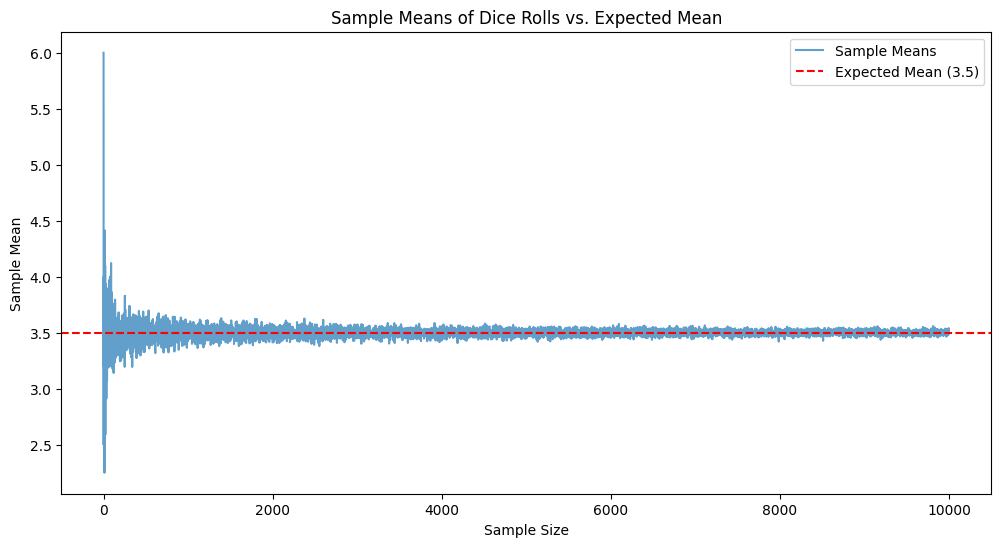

In [195]:
plt.figure(figsize=(12, 6))
plt.plot(sample_means, label='Sample Means', alpha=0.7)
plt.axhline(y=E_D, color='r', linestyle='--', label='Expected Mean (3.5)')

plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.title('Sample Means of Dice Rolls vs. Expected Mean')
plt.legend()

plt.show()

It can be seen from the graph that the sample mean varies much more when the sample size is smaller compared to that of when the sample size is larger. Although the graph shows that it doesn't reach the exact empirical mean, it gets really close to it as the sample size increases.

### (d)

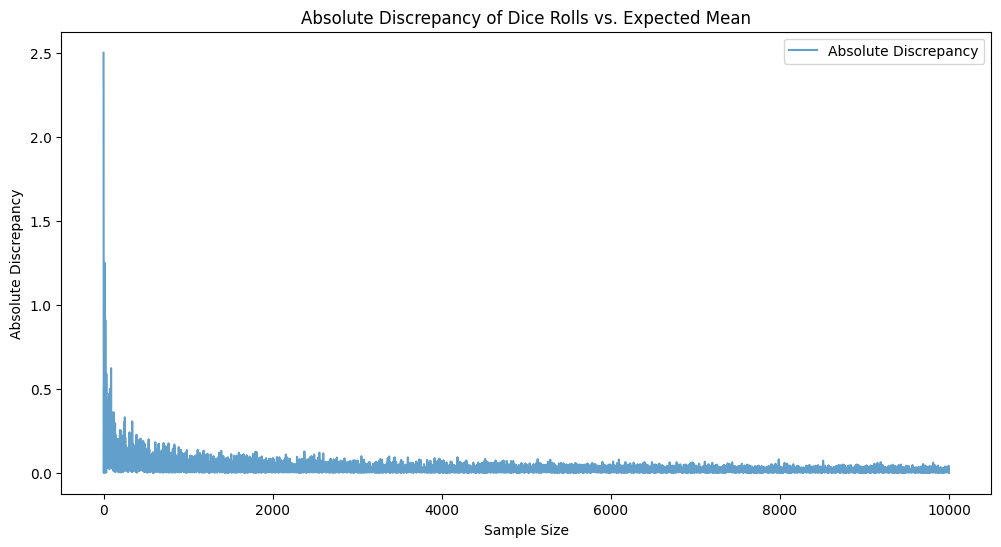

In [196]:
plt.figure(figsize=(12, 6))
plt.plot(absolute_discrepancy, label='Absolute Discrepancy', alpha=0.7)

plt.xlabel('Sample Size')
plt.ylabel('Absolute Discrepancy')
plt.title('Absolute Discrepancy of Dice Rolls vs. Expected Mean')
plt.legend()

plt.show()

One thing to note from the plot is as the sample size gets larger, the absolute difference between the sample mean and the empirical mean decreases almost to 0. What this goes to show from the Law of Large Numbers is that as the Sample Size increases to infinity, the absolute discrepancy between the sample mean and empirical mean decreases to 0.

## Problem 2.2

### (a)

In [197]:
rolls = [1, 2, 3, 4, 5, 6]
die_probabilities = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]
sample_means_unfair = []
for i in range (10000):
    sample_means_unfair.append(np.random.choice(rolls, i+1, p=die_probabilities).mean())

### (b)

In [198]:
E_D_unfair = rolls[0]*0.1+rolls[1]*0.1+rolls[2]*0.1+rolls[3]*0.1+rolls[4]*0.1+rolls[5]*0.5
print(E_D_unfair)
absolute_discrepancy_unfair = [abs(sample_mean - E_D_unfair) for sample_mean in sample_means_unfair]

4.5


### (c)

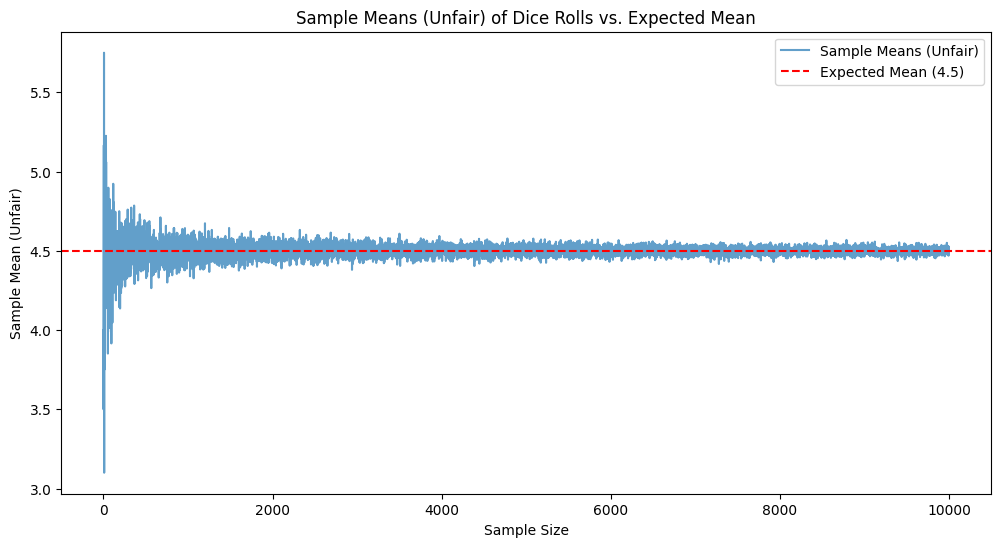

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(sample_means_unfair, label='Sample Means (Unfair)', alpha=0.7)
plt.axhline(y=E_D_unfair, color='r', linestyle='--', label=f'Expected Mean ({E_D_unfair})')

plt.xlabel('Sample Size')
plt.ylabel('Sample Mean (Unfair)')
plt.title('Sample Means (Unfair) of Dice Rolls vs. Expected Mean')
plt.legend()

plt.show()

One thing to note about the empirical average of an unfair die is that even though the probabilities of landing each face are different, when the sample size increases, the sample mean still approaches that of the empirical mean, similar to the graph of 2.1(c).

### (d)

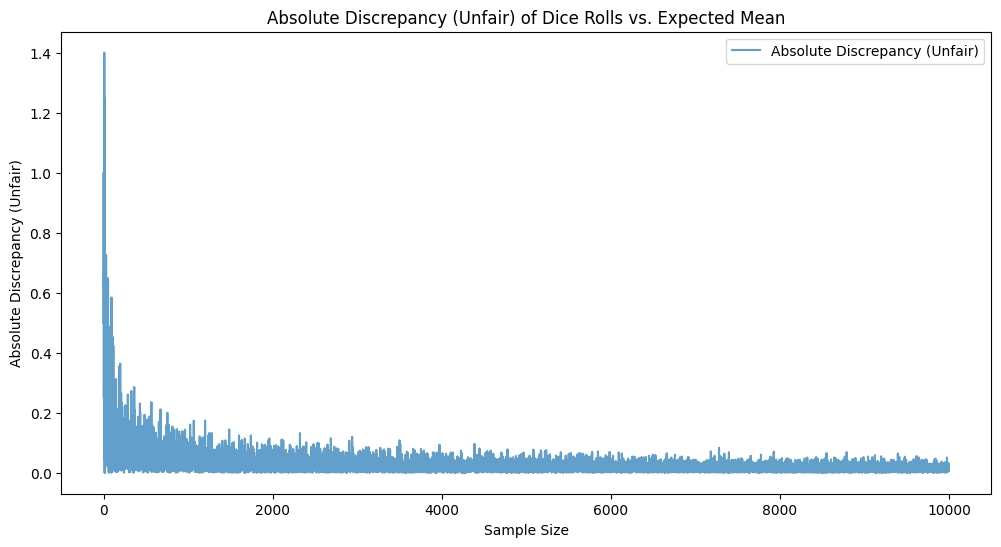

In [200]:
plt.figure(figsize=(12, 6))
plt.plot(absolute_discrepancy_unfair, label='Absolute Discrepancy (Unfair)', alpha=0.7)

plt.xlabel('Sample Size')
plt.ylabel('Absolute Discrepancy (Unfair)')
plt.title('Absolute Discrepancy (Unfair) of Dice Rolls vs. Expected Mean')
plt.legend()

plt.show()

The result is similar to that of 2.1(d): As the sample size increases to infinity, the absolute difference between the sample mean and the empirical mean decreases to 0.